# Homework #2: Simple Neural Network Implementation using Numpy

### Define the Sigmoid Function and its Derivative
- Construct a function returning a sigmoid function:
$ \sigma(x) = \frac{1}{1 + e^{-x}} $
- Construct a function returning the derivative of a sigmoid function:
$ \frac{d\sigma(x)}{dx} = \sigma(x)(1 - \sigma(x)) $

In [508]:
# define imports, constants and data.
import numpy as np

NEURONS = 3
LEANING_STEPS = 1000
LEARNING_RATE = 0.8

X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

y = np.array([
    [0],
    [0],
    [1],
    [1]
])

size = y.shape[0]

In [509]:
# define sigmoids
def sigmoid(x: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x: np.ndarray) -> np.ndarray:
    cached_sigmoid = sigmoid(x)
    return cached_sigmoid * (1 - cached_sigmoid)

### Initialize Weights
Build an array of three weights (3x1 array – think why these dimensions!) and initialize their value randomly. (It is good practice to use weights with normal distribution of $ \mu = 0 $ and  $ \sigma = \frac{1}{3}  $ )

from the following depiction of our neural network it is visible why we need a 3x1 weight array: 

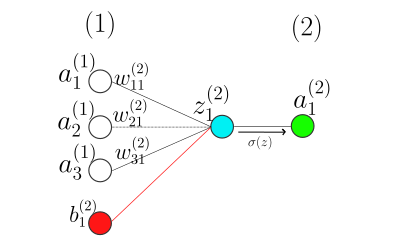


because we only have 3 input neurons and 1 output neuron we need 3 weights connecting between them for the neural network to be fully connected

In [510]:
# initialize the weights and biases
W = np.random.normal(0, 1/3, (NEURONS, 1))
b = np.random.normal(0, 1/3, (1))

## Training the Neural Network

### steps in this simple neural network:
- W is our vector of weights.
- b is our vector of biases (in our case only a single bias).
- X is the data vector.

### proof for backpropagation
For the proof we will take a look at a generic example for an $l$ layered network,  \
where $a^{(l)}_j$ is our j'th neuron in layer $l$, $w^{(l)}_{ij}$ is some weight going from a neuron $a^{(l - 1)}_i$ to the neuron  $a^{(l)}_j$ \
and $z^{(l)}_j$ is some $z$ that when passed through a sigmoid results in $a^{(l)}_j$ 

$
\\[10mm]
$

<!-- and all of this because github doesn't play nice with line breaks... -->

#### propagating forwards:
$z^{(l)}_j = w^{(l)}_{1j}a^{(l - 1)}_1 + w^{(l)}_{2j}a^{(l - 1)}_2 + ... + w^{(l)}_{nj}a^{(l - 1)}_n + b^{(l)}_{j} =\displaystyle(\sum_{j=1}^n w^{(l)}_{ij}a^{(l - 1)}_i) +  b^{(l)}_{j}$ \
$\hat{y} = a^{(l)}_j = \sigma(z^{(l)}_j)$

$
\\[10mm]
$

#### propagating backwards:
We will define y prediction as $a^{(l)}_i$. I will provide a proof for some $a^{(l)}_j$ and $w^{(l)}_{ij}$ and later substitute them for our indices, and for a general summation in the code.\
Initially we define our loss function, and chain rule: \
$Loss = \displaystyle\frac{1}{2n} \cdot \sum_{j=1}^n (a^{(l)}_j - y_j) ^ 2$ \
\
$\displaystyle\frac{\partial{Loss}}{\partial{w^{(l)}_{ij}}} = \textcolor{red}{\frac{\partial{Loss}}{\partial{a^{(l)}_j}}}\cdot\textcolor{blue}{\frac{\partial{a^{(l)}_j}}{\partial{z^{(l)}_j}}}\cdot\textcolor{lightgreen}{\frac{\partial{z^{(l)}_j}}{\partial{w^{(l)}_{ij}}}}
$\
\
now, lets differentiate each element by himself: \
$
\\[1.5mm]
    \displaystyle\frac{\partial{z^{(l)}_j}}{\partial{w^{(l)}_{ij}}} = a^{(l - 1)}_i \ \ \ \ \text{(we can clearly see it from the formula for z)}$\
$\\[1.5mm]
    \displaystyle\frac{\partial{a^{(l)}_j}}{\partial{z^{(l)}_j}} = \sigma'(z^{(l)}_j) = \sigma(z^{(l)}_j)\cdot(1 - \sigma(z^{(l)}_j)) \ \ \ \  \text{(we had proven this formula in our previous assignment)}
$\
$\\[1.5mm]
    \displaystyle\frac{\partial{Loss}}{\partial{a^{(l)}_j}} = \frac{\partial{}}{\partial{a^{(l)}_j}} \frac{1}{2n} \! \sum_{k=1}^n (a^{(l)}_j - y_j) ^ 2 = \frac{1}{2n} \! \sum_{k=1}^n \frac{\partial{}}{\partial{a^{(l)}_j}}  (a^{(l)}_k - y_k) ^ 2 = \frac{1}{2n} \! \frac{\partial{}}{\partial{a^{(l)}_j}}  (a^{(l)}_j - y_j) ^ 2 = \frac{1}{n} (a^{(l)}_j - y_j)
$

and thus we get that the chain rule evaluates to: 

$
     \displaystyle\frac{\partial{Loss}}{\partial{w^{(l)}_{ij}}} = \textcolor{red}{\frac{1}{n} (a^{(l)}_j - y_j)} \cdot \textcolor{blue}{\sigma(z^{(l)}_j)\cdot(1 - \sigma(z^{(l)}_j))} \cdot \textcolor{lightgreen}{a^{(l - 1)}_i}
$

For the biases it is pretty much the same chain rule and simplification, only differing in the last element. \
$
 \displaystyle\frac{\partial{Loss}}{\partial{b^{(l)}_{j}}} = \textcolor{red}{\frac{\partial{Loss}}{\partial{a^{(l)}_j}}}\cdot\textcolor{blue}{\frac{\partial{a^{(l)}_j}}{\partial{z^{(l)}_j}}}\cdot\textcolor{lightgreen}{\frac{\partial{z^{(l)}_j}}{\partial{b^{(l)}_{j}}}} $\
$\text{with  } {\frac{\partial{z^{(l)}_j}}{\partial{b^{(l)}_{j}}}} \ \  \text{being:}$\
$\displaystyle\frac{\partial{z^{(l)}_j}}{\partial{b^{(l)}_{j}}} = 1 \ \ \ \  \text{(we can clearly see it from our formula of z)}
$ \
such that we end up with: \
$
  \displaystyle\frac{\partial{Loss}}{\partial{b^{(l)}_{j}}} = \textcolor{red}{\frac{1}{n} (a^{(l)}_j - y_j)} \cdot \textcolor{blue}{\sigma(z^{(l)}_j)\cdot(1 - \sigma(z^{(l)}_j))} \cdot \textcolor{lightgreen}{1}
$

now we just repeat it for every weight and bias there is in layer l, after that we just subtract every weight with its derivative (gradient descent) and repeat it for X steps. \
also, because we have only 1 set of weights (2 layered network), we dont have to derive the formula backwards even more and this will suffice.

$
\left\{
\begin{aligned}
\ \    w^{(l)}_{ij} &= w^{(l)}_{ij} - t \cdot \displaystyle\frac{\partial{Loss}}{\partial{w^{(l)}_{ij}}} \\
\ \    b^{(l)}_{j} &= b^{(l)}_{j} - t \cdot \displaystyle\frac{\partial{Loss}}{\partial{b^{(l)}_{j}}}
\end{aligned} \!
\right.
$

In [511]:
# define the loss
def loss(y: np.ndarray, y_pred: np.ndarray) -> np.float64:
    return ((1 / (2 * y.shape[0])) * (y_pred - y) ** 2).sum()

In [512]:
for epoch in range(LEANING_STEPS):
    y_pred = sigmoid(X@W + b)
    z_derivative = (1 / size) * (y_pred - y) * sigmoid_derivative(y_pred)
    
    dW = X.T@z_derivative
    db = z_derivative.sum()
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    
    if epoch % 50 == 0:
        print(f"loss in step {epoch} is {loss(y, y_pred)}")

loss in step 0 is 0.10875070614374627
loss in step 50 is 0.03875252027776536
loss in step 100 is 0.01879589596496966
loss in step 150 is 0.010680325747975675
loss in step 200 is 0.0067684792014974845
loss in step 250 is 0.004630952586810012
loss in step 300 is 0.003350380027985261
loss in step 350 is 0.0025282377641765146
loss in step 400 is 0.0019714144469185632
loss in step 450 is 0.0015779582763980745
loss in step 500 is 0.001290230016624879
loss in step 550 is 0.0010737764734965495
loss in step 600 is 0.0009070326335573676
loss in step 650 is 0.0007759680920676375
loss in step 700 is 0.000671149158166214
loss in step 750 is 0.0005860507068006467
loss in step 800 is 0.000516046995936433
loss in step 850 is 0.0004577872750154352
loss in step 900 is 0.00040879765340385725
loss in step 950 is 0.0003672203939132086


In [513]:
print(f"our final weights array is: {W.flatten().tolist()}")
print(f"our final bias is: {b[0]}")
print(f"and the final loss after 1000 epochs is: {loss(y, y_pred).round(10)}")

our final weights array is: [7.293878337278041, -0.24128074438886937, -1.7336793227961267]
our final bias is: -1.7939006136552438
and the final loss after 1000 epochs is: 0.0003322995


In [514]:
for i in range(4):
    print(f"checking for X: {X[i]} and y: {y[i]} and the result:", sigmoid(X[i]@W + b)[0])

checking for X: [0 0 1] and y: [0] and the result: 0.02853760312079128
checking for X: [0 1 1] and y: [0] and the result: 0.02255774652457821
checking for X: [1 0 1] and y: [1] and the result: 0.9773856888666327
checking for X: [1 1 1] and y: [1] and the result: 0.9713912763806155


The results indicate that there is a separation of the values, when $y$ is 0, our $\hat{y}$ approaches 0 and vise versa when $y$ is 1